In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pywaffle import Waffle
import squarify

In [76]:
ceo_df = pd.read_csv("management-positions/management-positions.csv")
ceo_df.rename(columns={'Pacific Island Countries and territories':'island'}, inplace=True)
ceo_df = ceo_df[["island", "TIME_PERIOD", "OBS_VALUE", "Age"]]
ceo_df.columns = ["island", "year", "share_female_lead", "age"]
ceo_df["categories"] = ceo_df["island"]+" "+ceo_df["age"]
ceo_df.sort_values(by=["island", "year", "age"], inplace=True, ascending=False)
ceo_df

,island,year,share_female_lead,age,categories
15,Vanuatu,2019,26.8,55-64,Vanuatu 55-64
14,Vanuatu,2019,22.7,25-54,Vanuatu 25-54
18,Tuvalu,2015,24.4,55-64,Tuvalu 55-64
2,Tuvalu,2015,37.9,25-54,Tuvalu 25-54
0,Tonga,2021,27.8,55-64,Tonga 55-64
4,Tonga,2021,37.9,25-54,Tonga 25-54
5,Solomon Islands,2012,7.3,55-64,Solomon Islands 55-64
6,Solomon Islands,2012,22.3,25-54,Solomon Islands 25-54
3,Samoa,2013,42.3,55-64,Samoa 55-64
12,Samoa,2013,39.1,25-54,Samoa 25-54


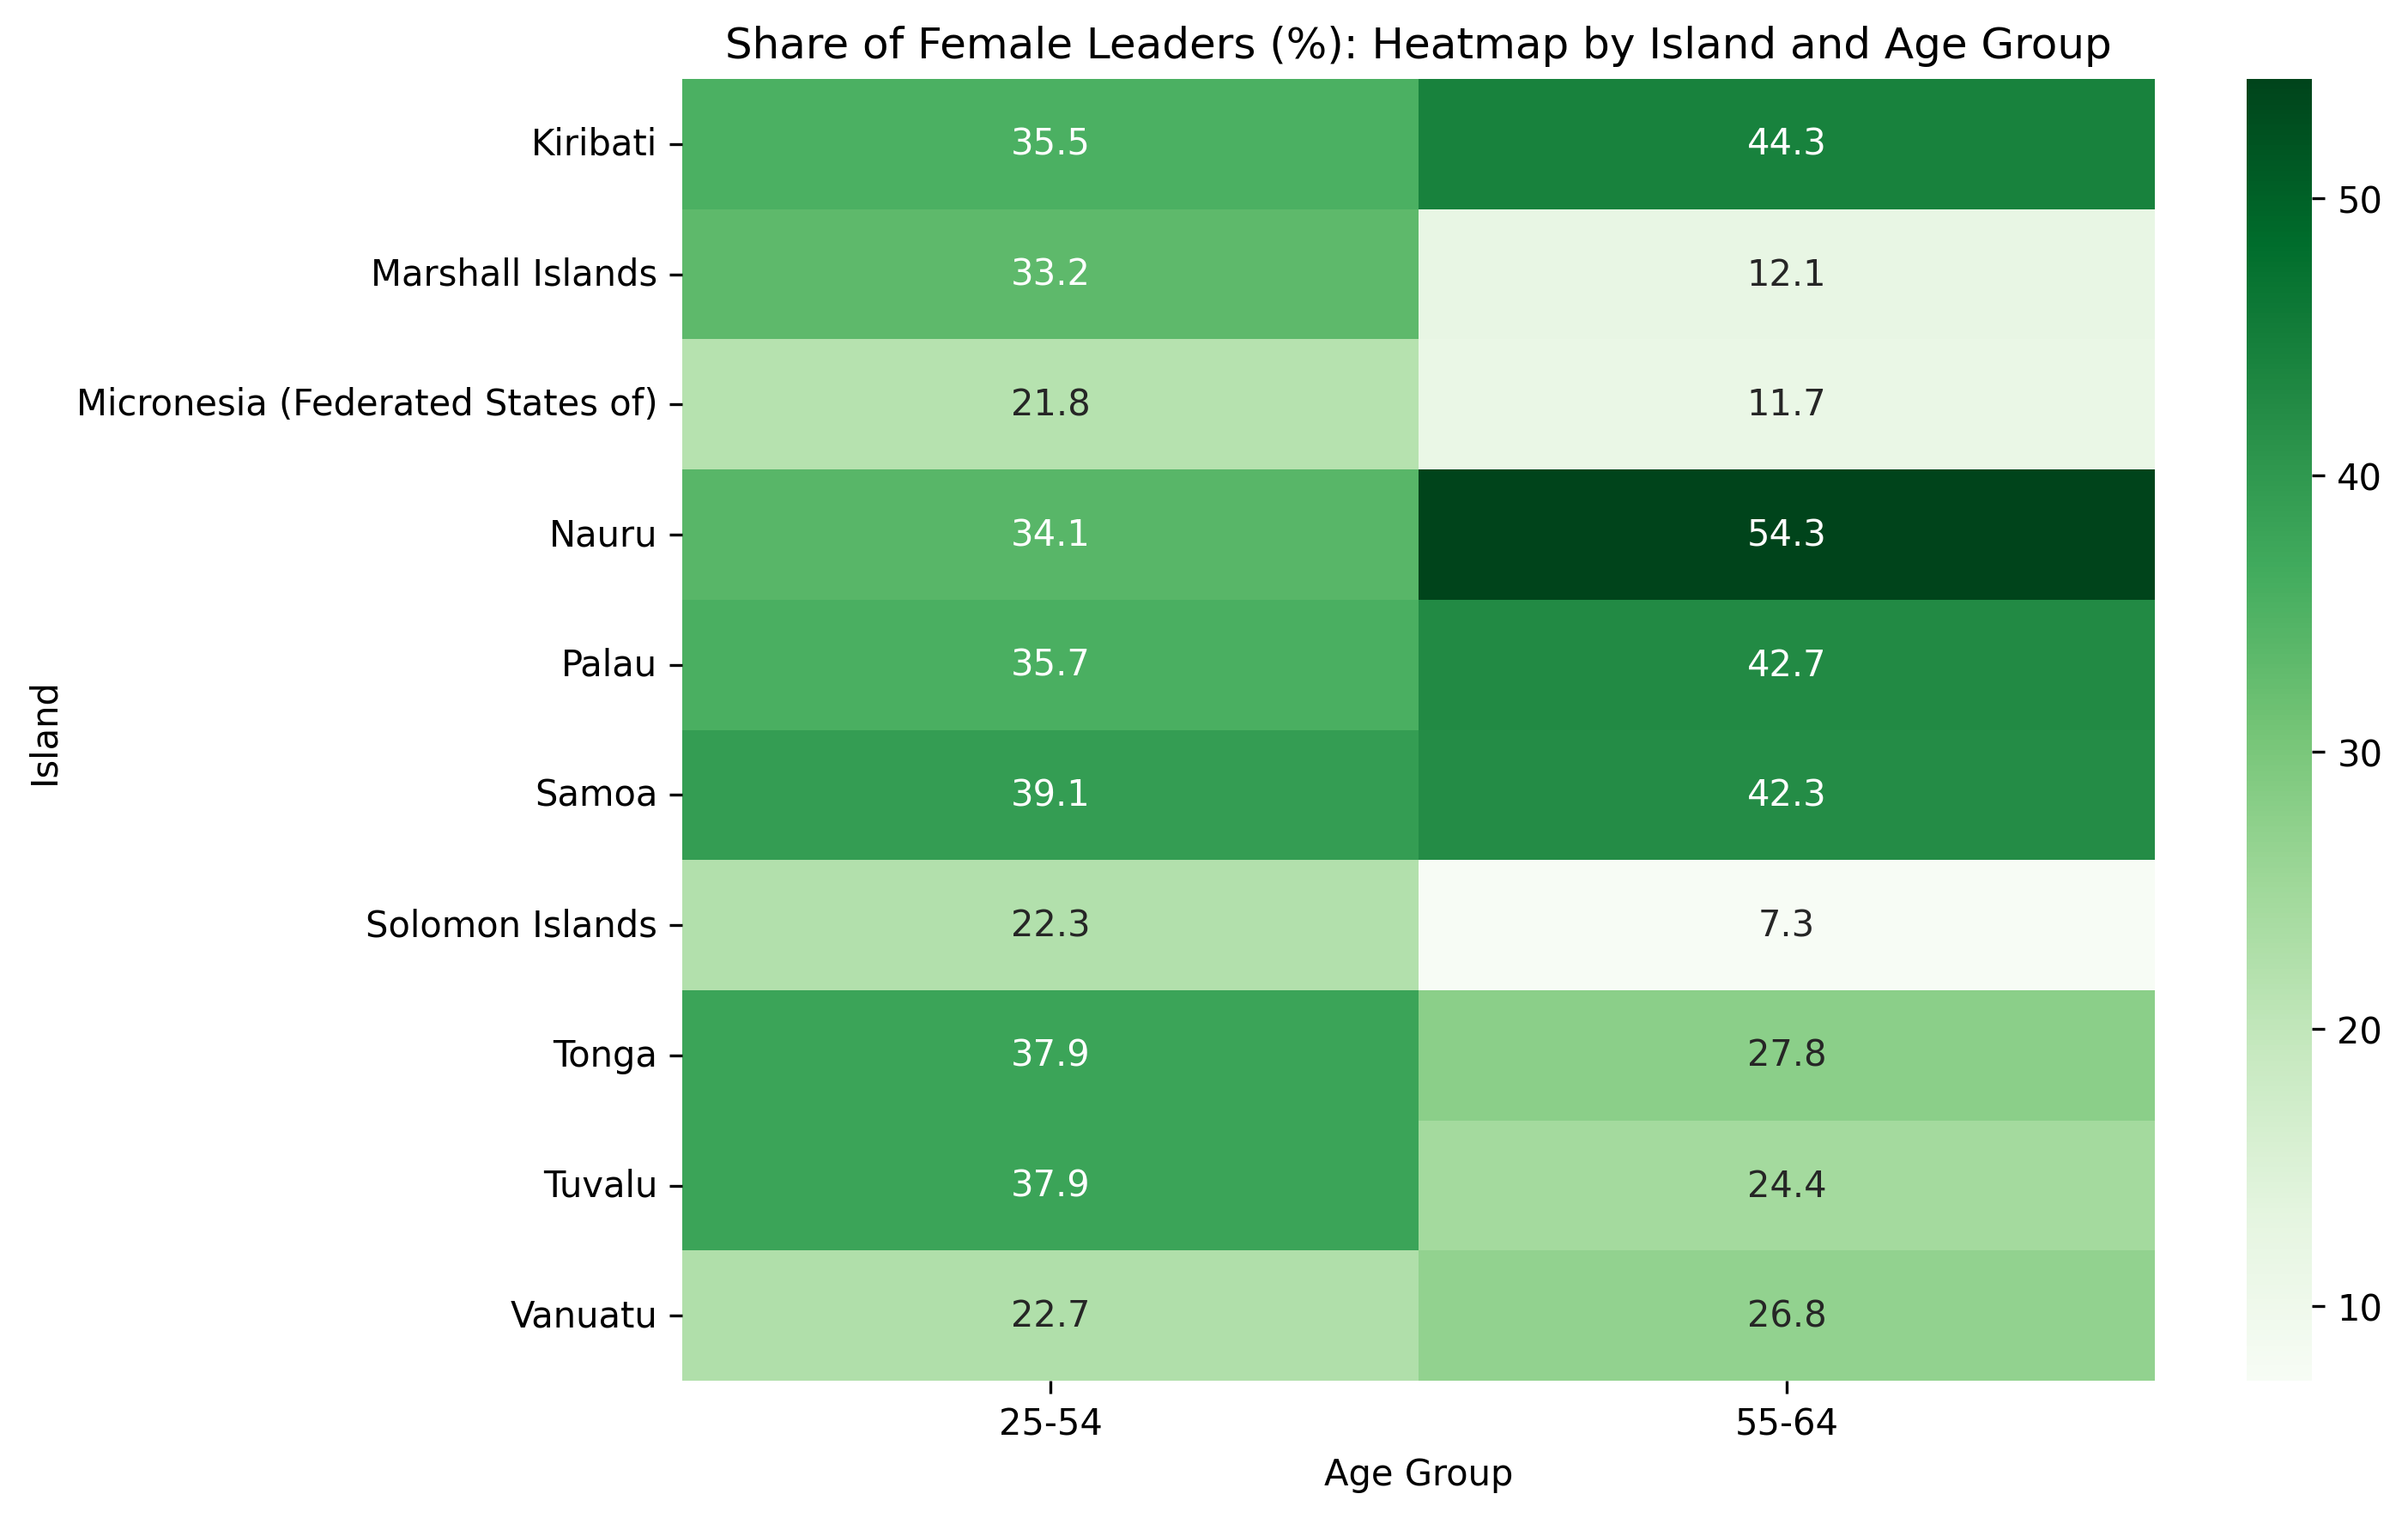

In [78]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

pivot_df = ceo_df.pivot(index='island', columns='age', values='share_female_lead')
sns.heatmap(pivot_df, annot=True, cmap='Greens', ax=ax, fmt='.1f')

ax.set_title('Share of Female Leaders (%): Heatmap by Island and Age Group')
ax.set_ylabel('Island')
ax.set_xlabel('Age Group')

plt.tight_layout()
plt.show()


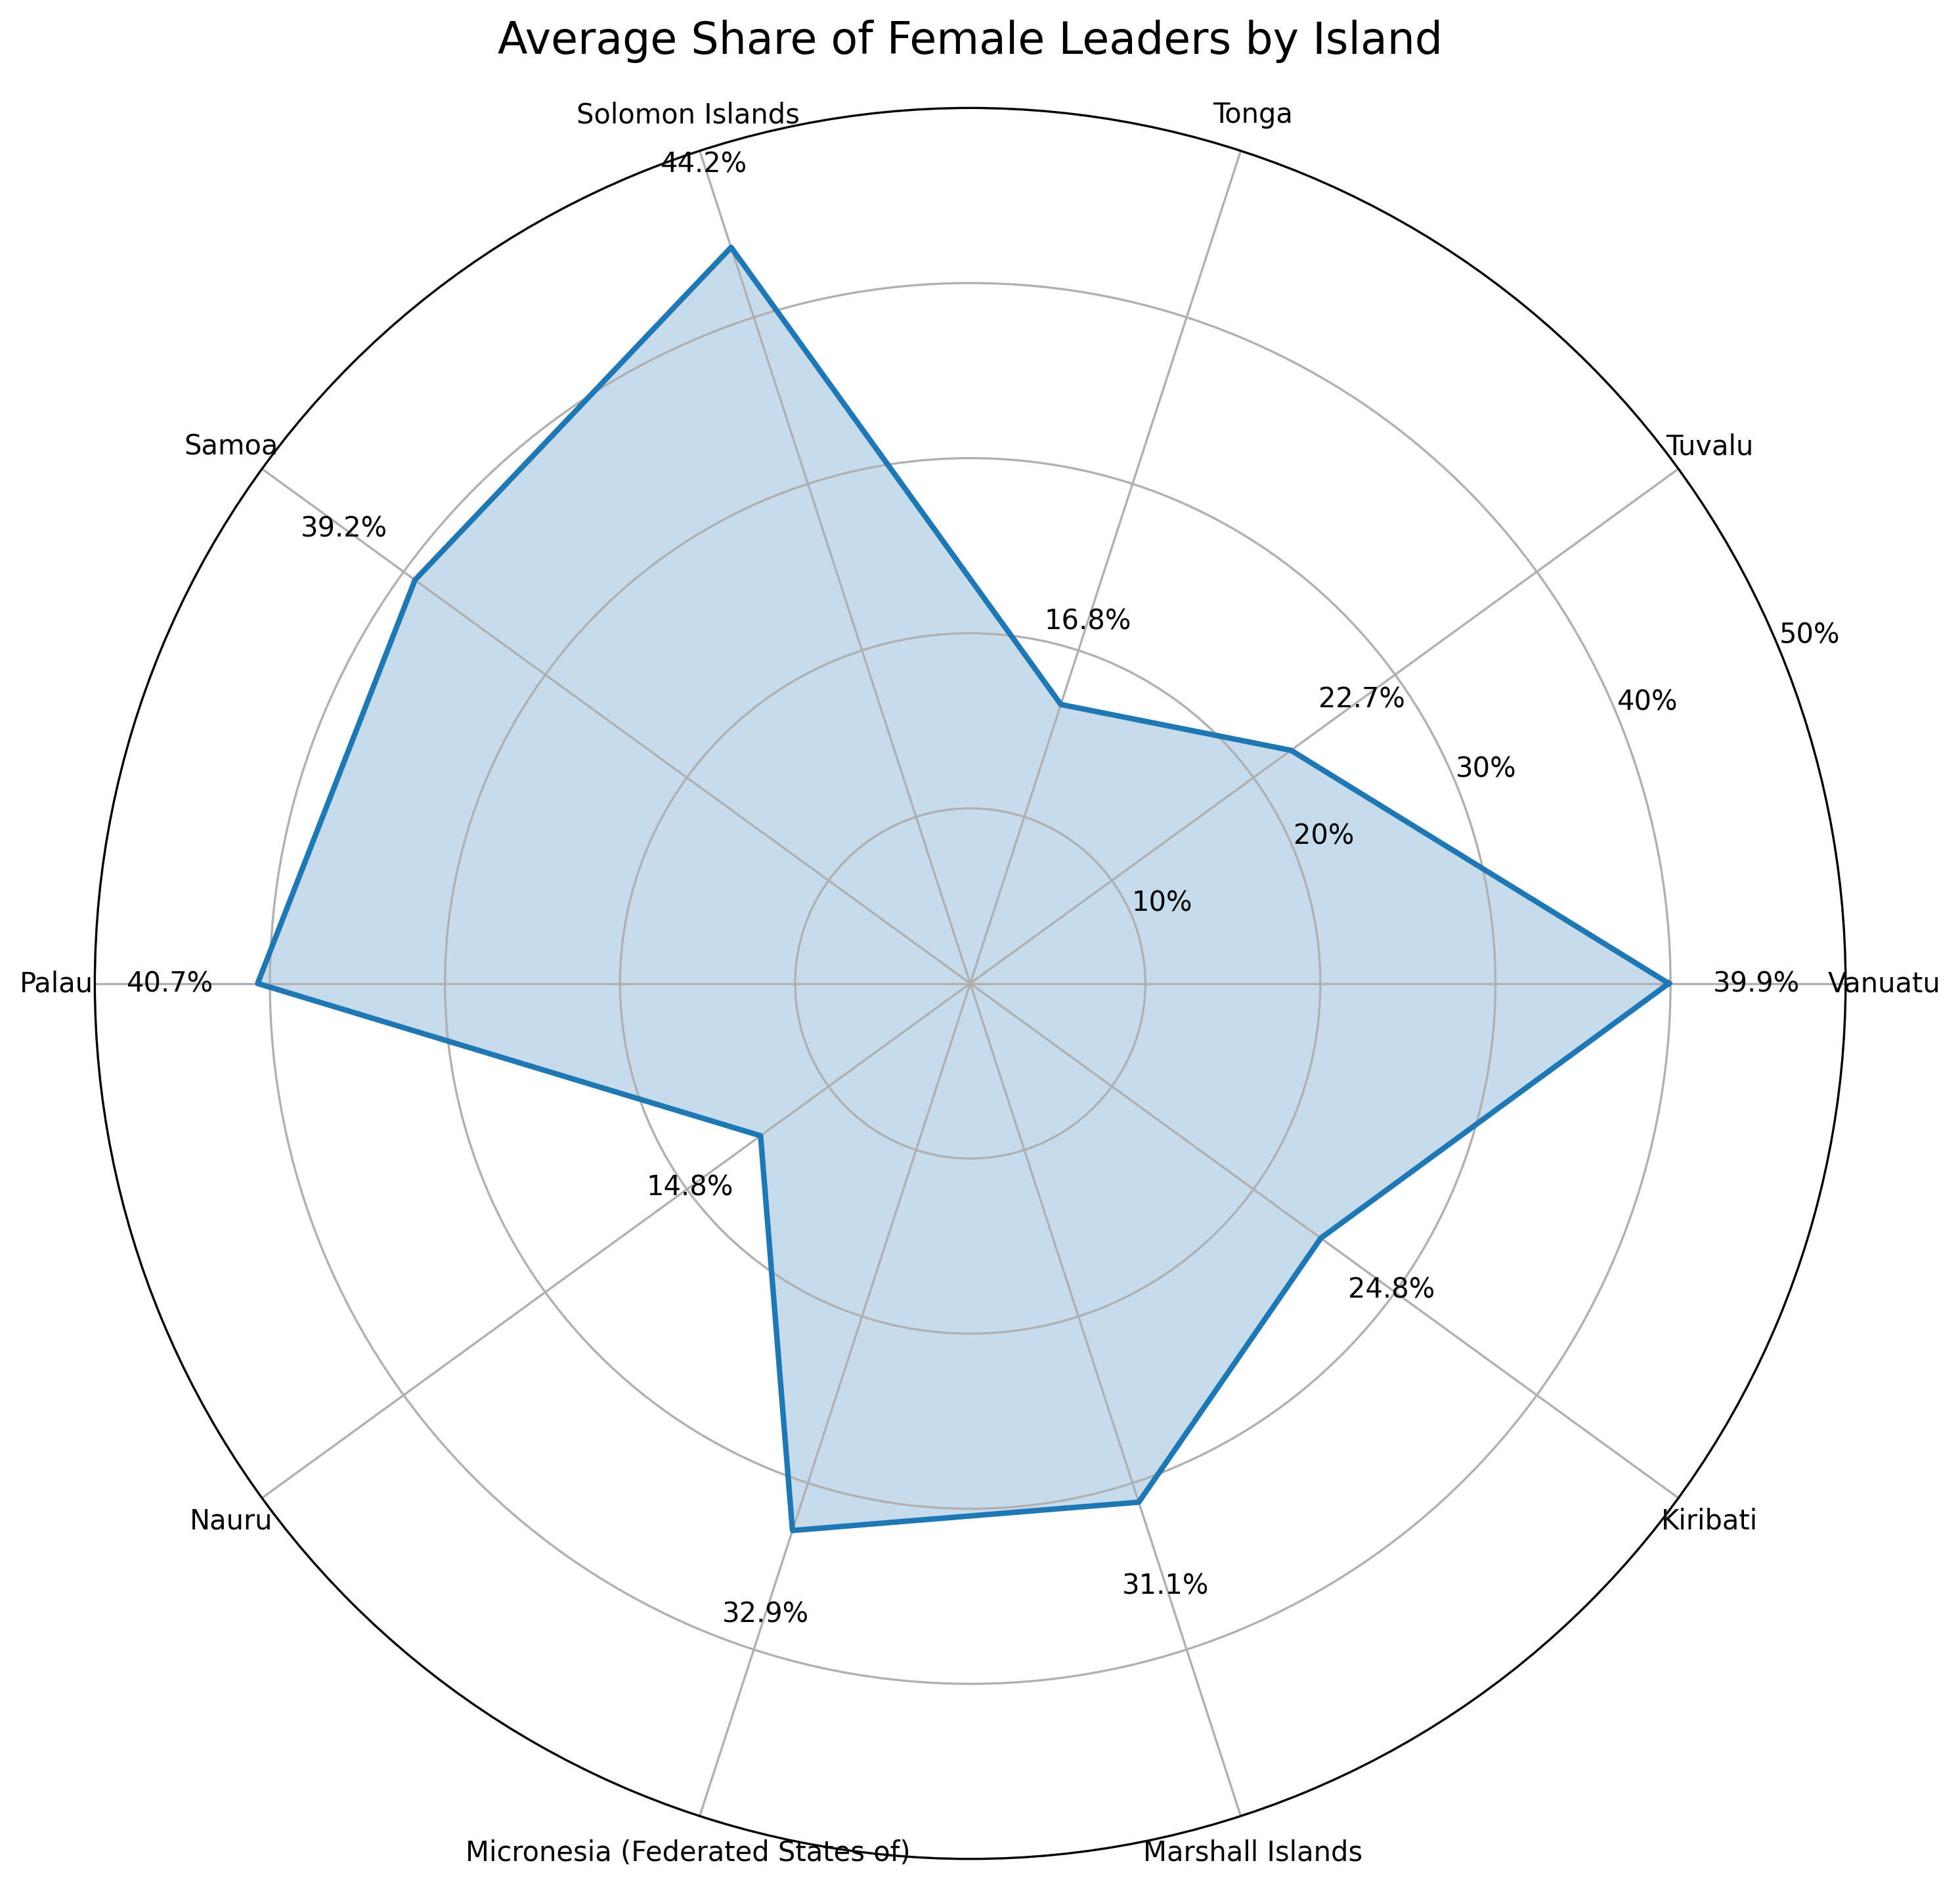

In [47]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'), dpi=300)

islands = ceo_df['island'].unique()
N = len(islands)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

values = ceo_df.groupby('island')['share_female_lead'].mean().values
values = np.concatenate((values, [values[0]]))

ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(islands)
ax.set_ylim(0, 50)
ax.set_yticks(np.arange(10, 51, 10))
ax.set_yticklabels([f"{i}%" for i in range(10, 51, 10)])

ax.set_title("Average Share of Female Leaders by Island", fontsize=16, pad=20)

for angle, value in zip(angles[:-1], values[:-1]):
    ax.text(angle, value + 5, f'{value:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

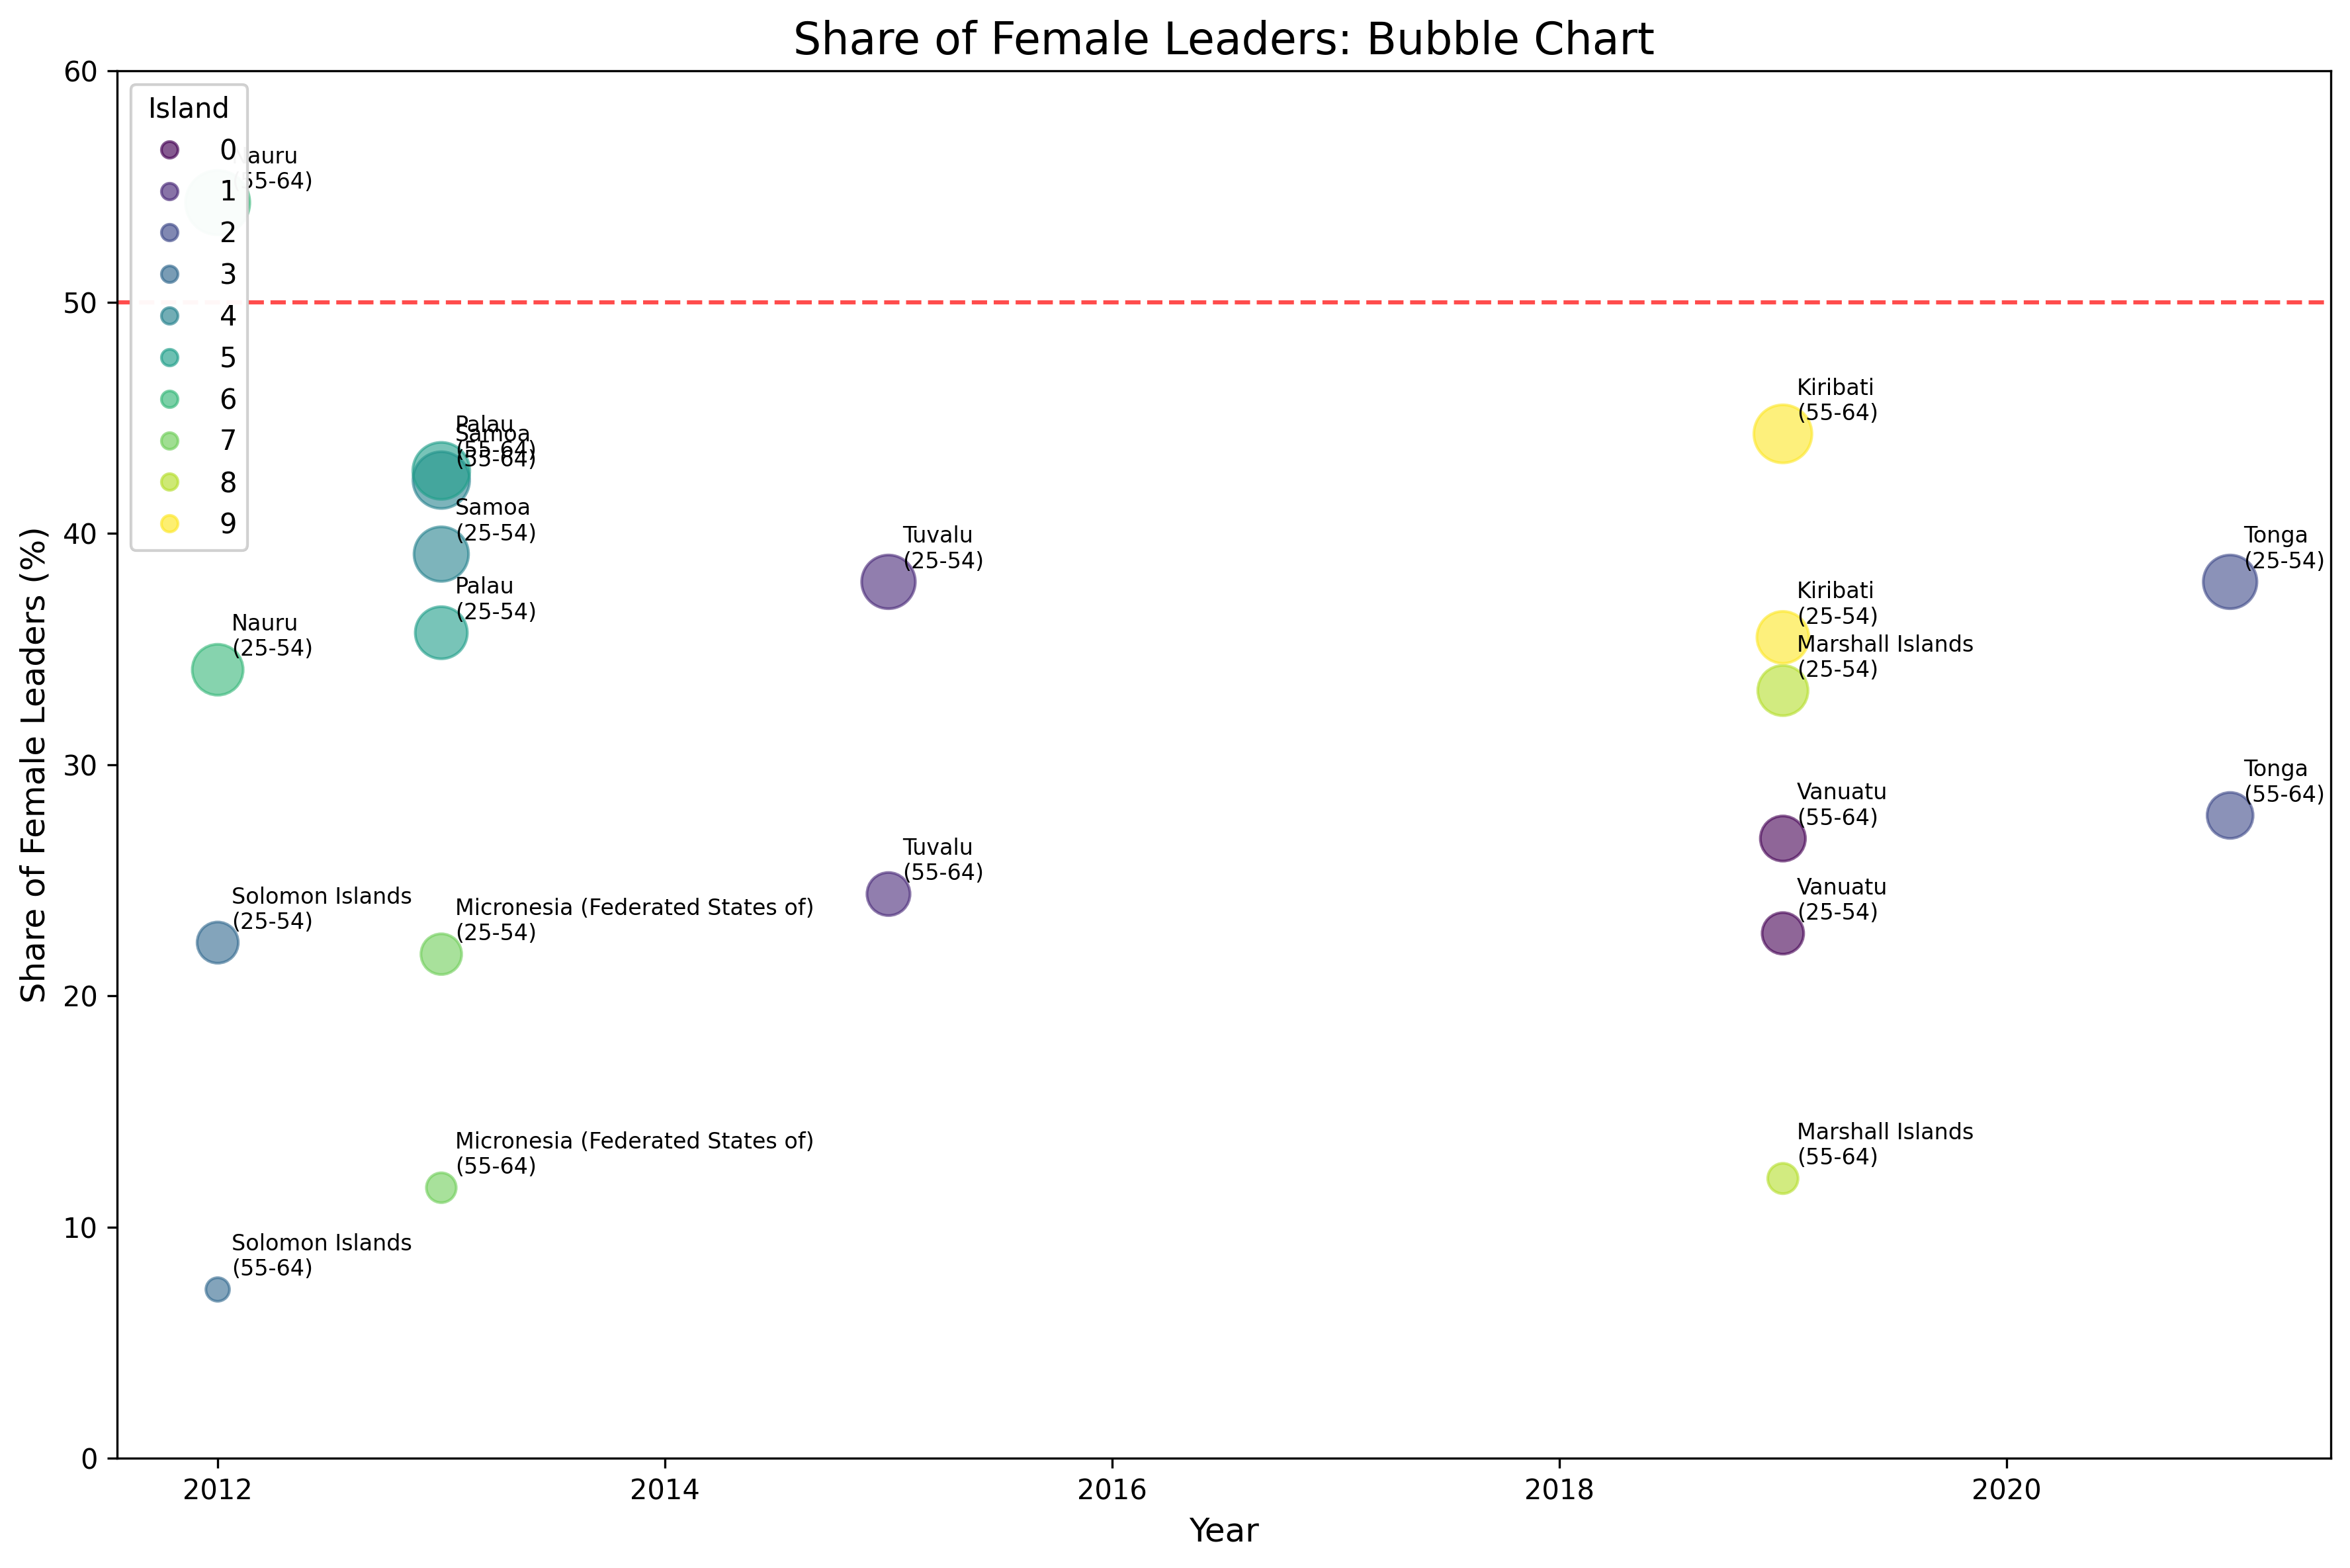

In [49]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

scatter = ax.scatter(ceo_df['year'], ceo_df['share_female_lead'], 
                     s=ceo_df['share_female_lead']*10, 
                     c=pd.factorize(ceo_df['island'])[0], 
                     alpha=0.6, 
                     cmap='viridis')

for i, txt in enumerate(ceo_df['island']):
    ax.annotate(f"{txt}\n({ceo_df['age'].iloc[i]})", 
                (ceo_df['year'].iloc[i], ceo_df['share_female_lead'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Share of Female Leaders (%)', fontsize=12)
ax.set_title('Share of Female Leaders: Bubble Chart', fontsize=16)

ax.axhline(y=50, color='r', linestyle='--', alpha=0.7, label='50% Line')

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Island")
ax.add_artist(legend1)

ax.set_ylim(0, 60)

plt.tight_layout()
plt.show()

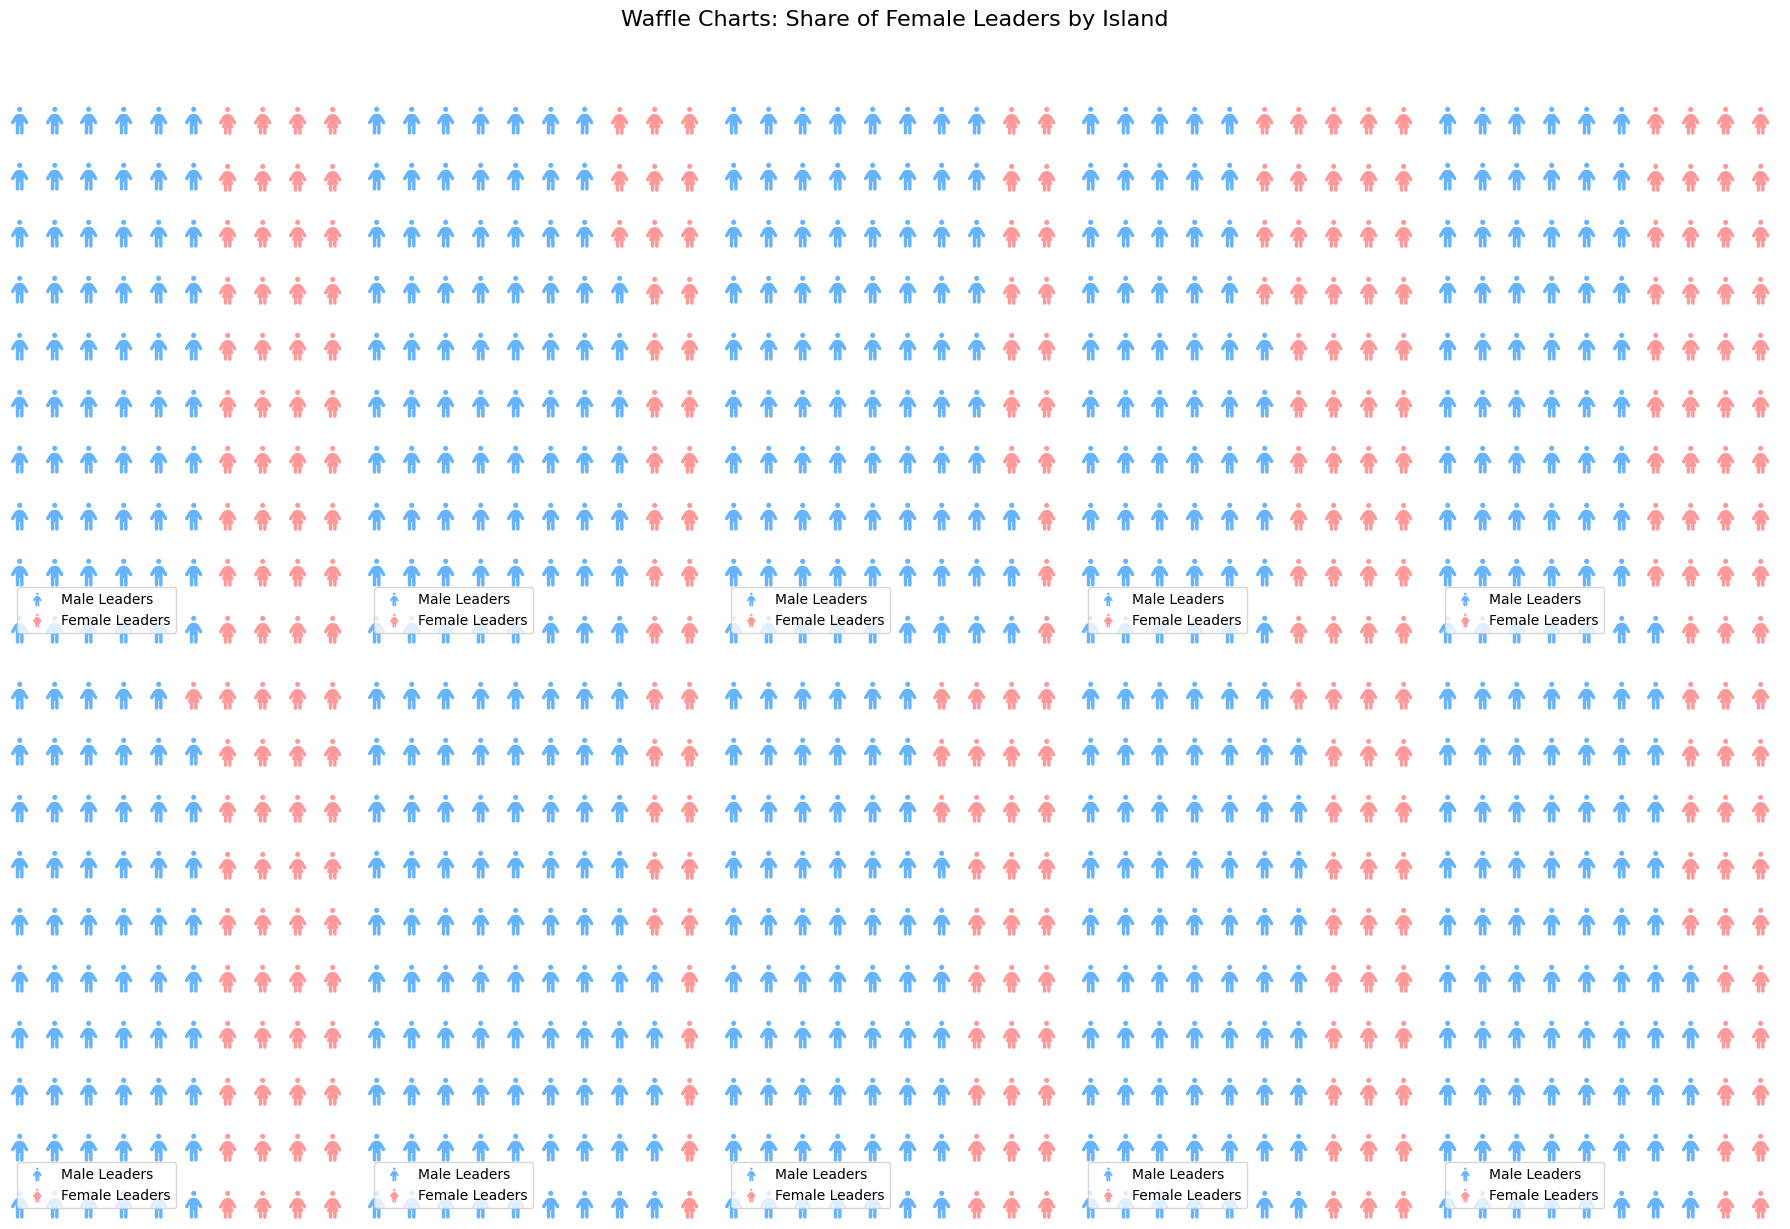

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Assuming ceo_df is already loaded

# Calculate average share of female leaders for each island
island_avg = ceo_df.groupby('island')['share_female_lead'].mean().reset_index()

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, int(len(island_avg)/2), figsize=(18, 12))
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

for i, (index, row) in enumerate(island_avg.iterrows()):
    female_share = row['share_female_lead']
    male_share = 100 - female_share
    Waffle.make_waffle(
        ax=axs[i],
        rows=10,
        columns=10,
        values=[male_share, female_share],
        colors=["#66b3ff", "#ff9999"],
        labels=['Male Leaders', 'Female Leaders'],
        legend={'loc': 'lower left'},
        icons=['male', 'female'],
        icon_size=20,
        icon_legend=True,
        #title=f'{row["island"]}\nFemale Leaders: {female_share:.1f}%'
    )

# Remove the extra subplot
axs[-1].axis('off')

plt.suptitle("Waffle Charts: Share of Female Leaders by Island", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

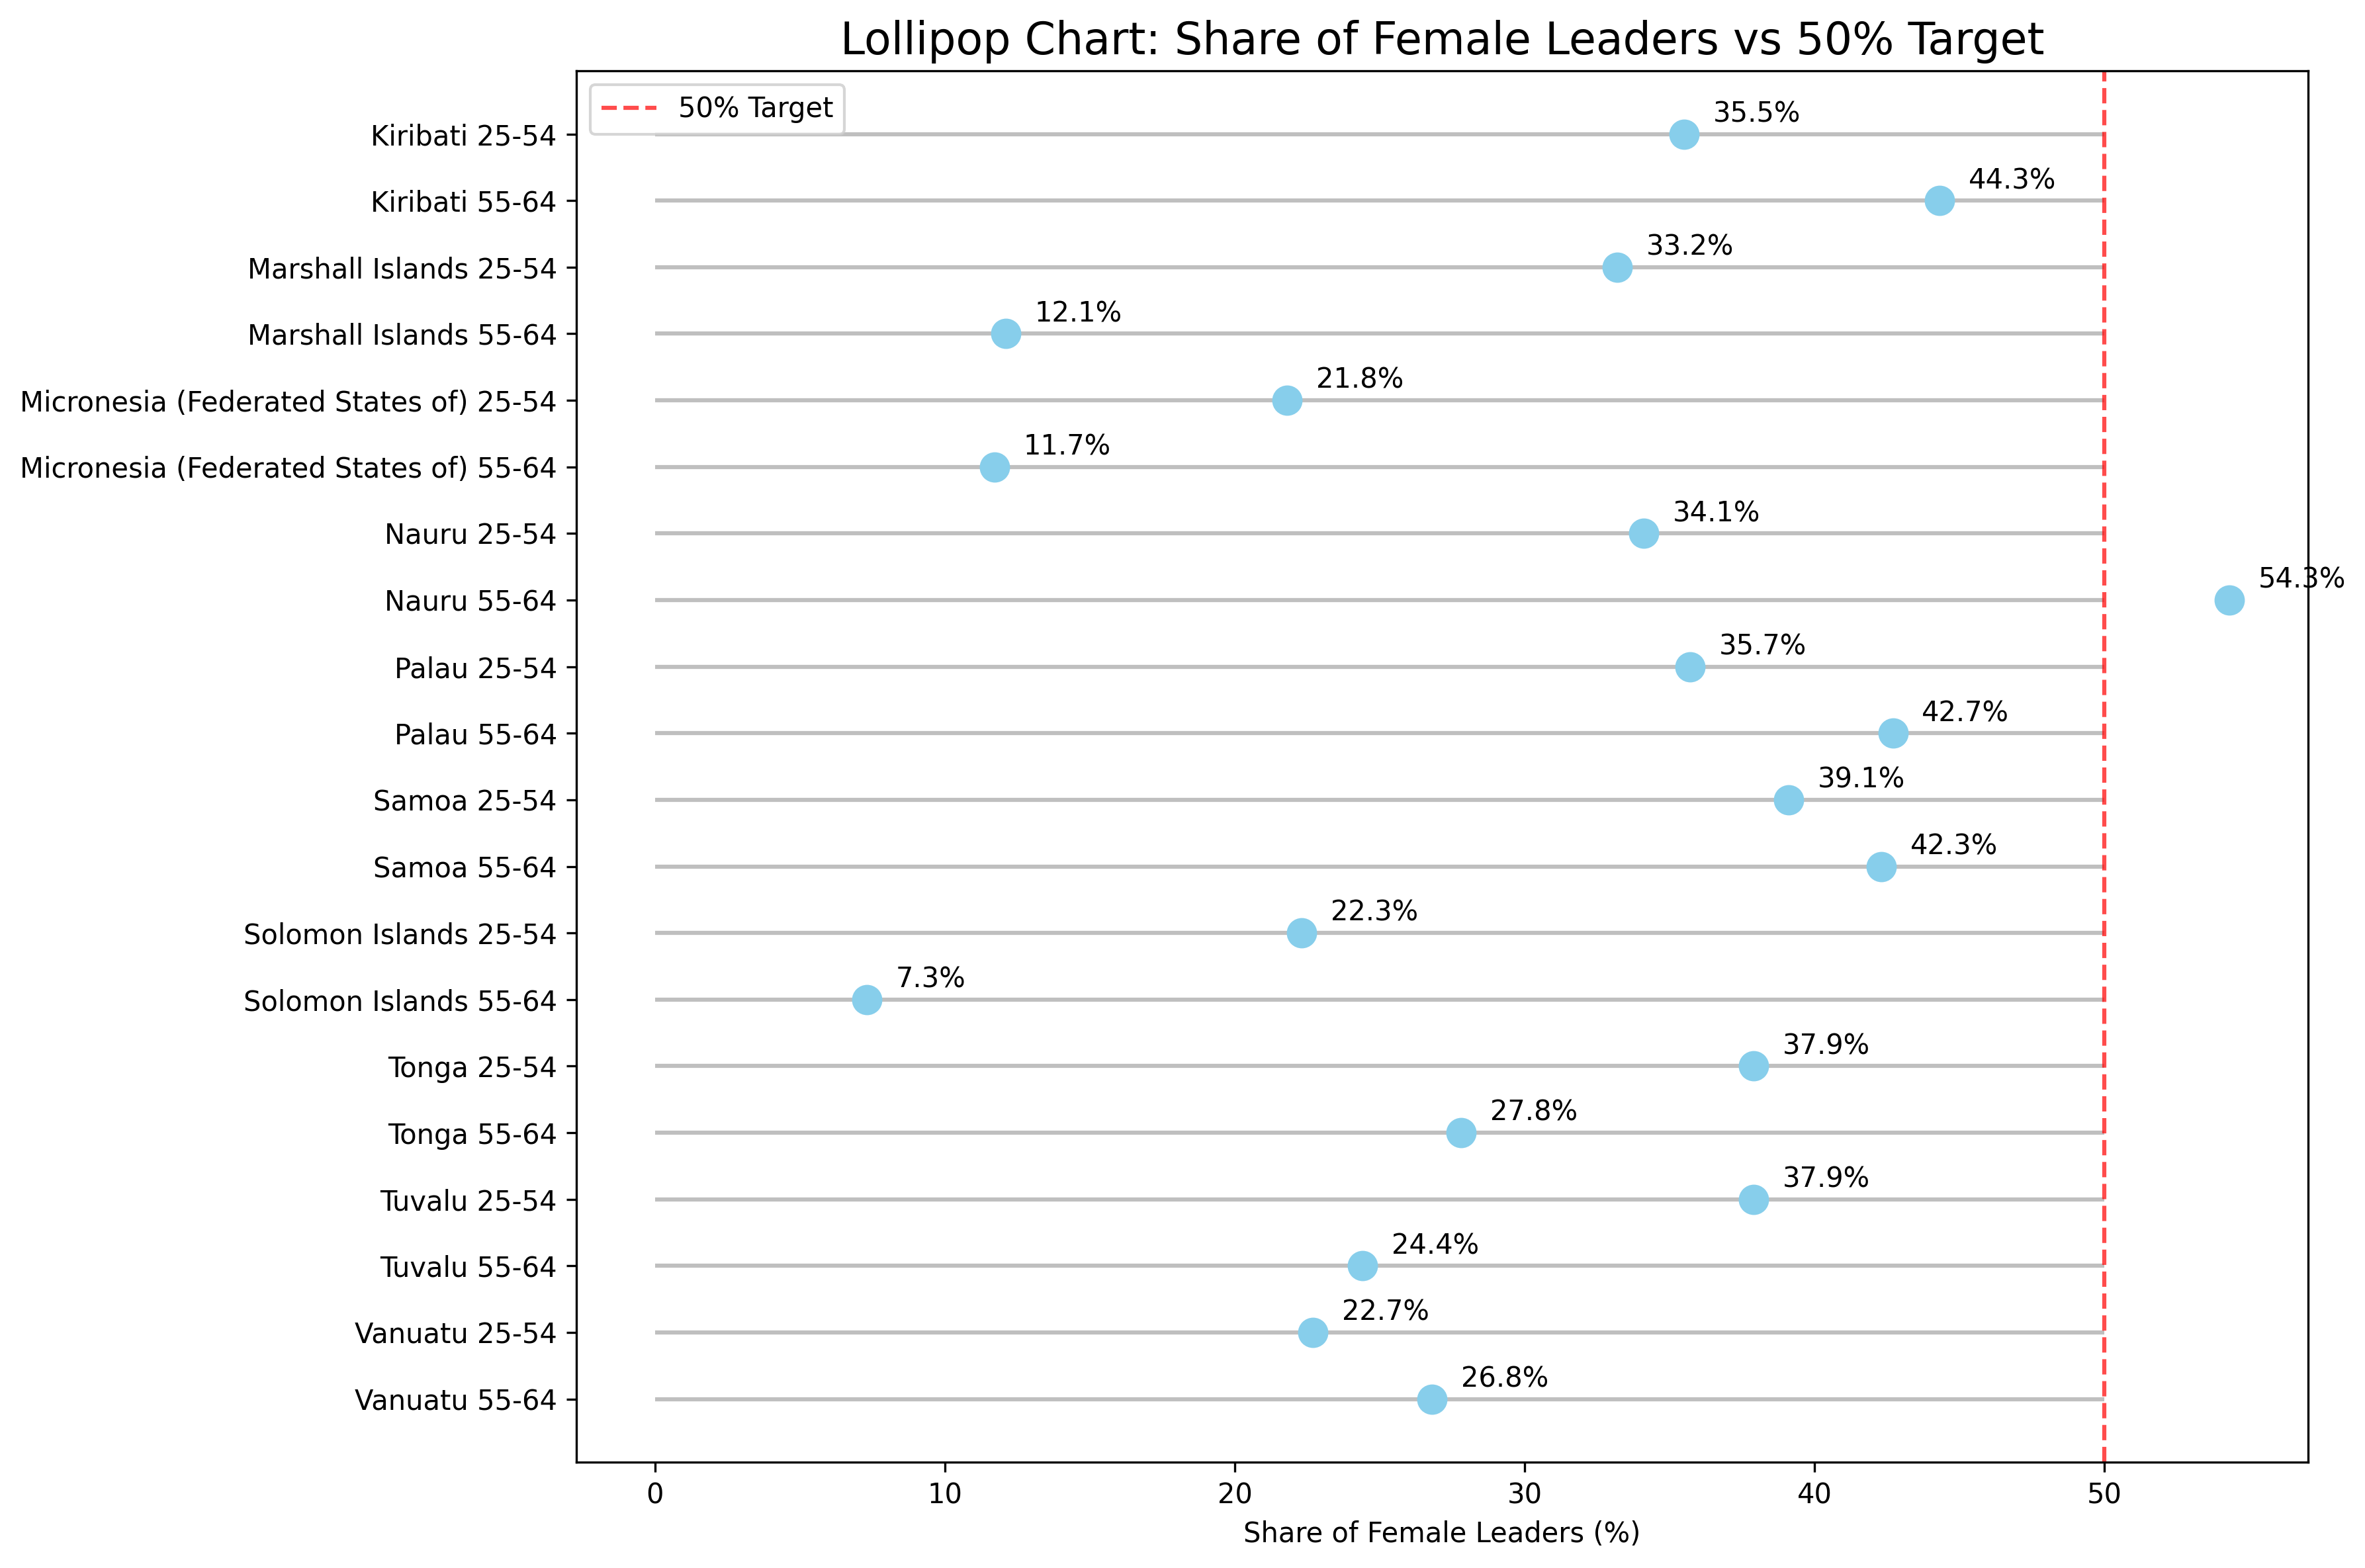

In [71]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

y_pos = np.arange(len(ceo_df))
ax.hlines(y=y_pos, xmin=0, xmax=50, color='gray', alpha=0.5)
ax.scatter(ceo_df['share_female_lead'], y_pos, color='skyblue', s=100, zorder=2)

ax.set_yticks(y_pos)
ax.set_yticklabels(ceo_df['categories'])
ax.set_xlabel('Share of Female Leaders (%)')
ax.set_title('Lollipop Chart: Share of Female Leaders vs 50% Target', fontsize=16)

ax.axvline(x=50, color='r', linestyle='--', alpha=0.7, label='50% Target')
ax.legend()

for i, v in enumerate(ceo_df['share_female_lead']):
    ax.text(v + 1, i+0.3, f'{v}%', va='center')

plt.tight_layout()
plt.show()

In [18]:
educ_df = pd.read_csv("education-level/education-level.csv")
educ_df.rename(columns={'Pacific Island Countries and territories':'island'}, inplace=True)
educ_df = educ_df[["island", "TIME_PERIOD", "OBS_VALUE", "Sex", "Age", "Education level"]]
educ_df.columns = ["island", "year", "count", "sex", "age", "level"]
educ_df = educ_df[~educ_df["level"].isin(["Level not stated", "All education levels"])]

educ_df.replace({
   "Early childhood education": "Highschool and below",
   "Primary education": "Highschool and below",
   "Lower secondary education": "Highschool and below",
   "Upper secondary education": "Highschool and below",
   "Post-secondary non-tertiary education": "After highschool",
   "Tertiary education": "After highschool"
}, inplace=True)
educ_df = educ_df.groupby(by=["island", "year", "sex", "age", "level"])["count"].sum().reset_index()
educ_df.head(20)

,island,year,sex,age,level,count
0,Kiribati,2020,Female,25-54,After highschool,1318
1,Kiribati,2020,Female,25-54,Highschool and below,20118
2,Kiribati,2020,Female,55-64,After highschool,133
3,Kiribati,2020,Female,55-64,Highschool and below,3626
4,Kiribati,2020,Male,25-54,After highschool,1054
5,Kiribati,2020,Male,25-54,Highschool and below,18806
6,Kiribati,2020,Male,55-64,After highschool,172
7,Kiribati,2020,Male,55-64,Highschool and below,2859
8,Marshall Islands,2021,Female,25-54,After highschool,1194
9,Marshall Islands,2021,Female,25-54,Highschool and below,4684
